# Praktični izpit tečaja Analitika podatkov v Python-u

Čas reševanja: `120 min`

Skupno število točk: `70 pts`

Odgovore na vprašanja vnesite v celice z komentarjem `# Odgovor`

Za vsa vprašanja smo na voljo.

Lahko si pomagate z uporabo gradiv in internetom. Ne pozabite na uradno dokumentacijo.

Srečno!!

**Pred začetkom izpita zaženite spodnjo celico:**
    
    

In [148]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## DEL 1 - Priprava (30 pts)

### 1.1) Uvoz podatkov 

`2 pts`

Pridobili smo podatke registracije avtomobilov v Sloveniji za marec 2019. Datoteka se imenuje `DATA_vozila_marec_clean1.csv`. 

V spodnji spremenljivki je shranjena pot do datoteke. Naložite podatke v pandas dataframe, da jih lako uporabimo za nadaljno obdelavo.

In [149]:
path = 'data/DATA_vozila_RAW.csv'

In [150]:
# Odgovor
df = pd.read_csv(path, delimiter= ';')
df.head()



,Unnamed: 0,Unnamed: 0.1,Datum prve registracije vozila,Registrsko obmocje tablice prve registracije,Starost uporabnika vozila,Spol uporabnika,Upravna enota uporabnika vozila,Znamka,Drzava (koda),Masa vozila,Kategorija in vrsta vozila (opis),Nazivna moc,Vrsta goriva (opis),P.1.5-Oznaka motorja,S.1-Stevilo sedezev (vkljucno z vozniskim),T-Najvisja hitrost,V.8-Kombinirana poraba goriva,Homologacijska,Dvtredu,Leto izdelave
0,0,0,24.10.2007,KR?KO,61.0,M,2,BMW,DEU,223,motorno kolo,80,Bencin,122EF,2.0,215.0,NaN,NaN,NaN,2007
1,1,1,25.03.2019,MURSKA SOBOTA,58.0,Z,36,FIAT,ITA,1270,osebni avtomobil,70,Bencin,843A1000,5.0,185.0,"7,7",NaN,NaN,2019
2,2,2,01.08.2008,CELJE,71.0,M,59,HONDA,JPN,242,motorno kolo,37,Bencin,PF01E,2.0,160.0,NaN,NaN,NaN,2008
3,3,3,08.03.2019,KRANJ,64.0,M,58,DEUTZ-FAHR,ITA,5200,traktor,53,Dizel,1000.3WTI3E3,1.0,40.0,NaN,NaN,"40,8-92",2019
4,4,4,26.04.2011,NOVA GORICA,63.0,Z,37,MERCEDES BENZ,DEU,1435,osebni avtomobil,103,Dizel,640.941,5.0,200.0,"5,3",NaN,NaN,2011


### 1.2) Prikaz osnovnih lastnosti podatkov

#### 1.2.1) Prikažite obliko uvoženega dataframe-a

`1 pts`

In [151]:
# Odgovor
df.shape



(14649, 20)

#### 1.2.2) Prikažite tipe spremenljivk za vsak stolpec uvoženega dataframe-a

`1 pts`

In [152]:
# Odgovor
df.dtypes

Unnamed: 0                                        int64
Unnamed: 0.1                                      int64
Datum prve registracije vozila                   object
Registrsko obmocje tablice prve registracije     object
Starost uporabnika vozila                       float64
Spol uporabnika                                  object
Upravna enota uporabnika vozila                   int64
Znamka                                           object
Drzava (koda)                                    object
Masa vozila                                      object
Kategorija in vrsta vozila (opis)                object
Nazivna moc                                      object
Vrsta goriva (opis)                              object
P.1.5-Oznaka motorja                             object
S.1-Stevilo sedezev (vkljucno z vozniskim)      float64
T-Najvisja hitrost                              float64
V.8-Kombinirana poraba goriva                    object
Homologacijska                                  

#### 1.2.3) Prikažite prvih 7 vrstic uvoženega dataframe-a

`1 pts`

In [153]:
# Odgovor
df.head(7)


,Unnamed: 0,Unnamed: 0.1,Datum prve registracije vozila,Registrsko obmocje tablice prve registracije,Starost uporabnika vozila,Spol uporabnika,Upravna enota uporabnika vozila,Znamka,Drzava (koda),Masa vozila,Kategorija in vrsta vozila (opis),Nazivna moc,Vrsta goriva (opis),P.1.5-Oznaka motorja,S.1-Stevilo sedezev (vkljucno z vozniskim),T-Najvisja hitrost,V.8-Kombinirana poraba goriva,Homologacijska,Dvtredu,Leto izdelave
0,0,0,24.10.2007,KR?KO,61.0,M,2,BMW,DEU,223,motorno kolo,80,Bencin,122EF,2.0,215.0,NaN,NaN,NaN,2007
1,1,1,25.03.2019,MURSKA SOBOTA,58.0,Z,36,FIAT,ITA,1270,osebni avtomobil,70,Bencin,843A1000,5.0,185.0,"7,7",NaN,NaN,2019
2,2,2,01.08.2008,CELJE,71.0,M,59,HONDA,JPN,242,motorno kolo,37,Bencin,PF01E,2.0,160.0,NaN,NaN,NaN,2008
3,3,3,08.03.2019,KRANJ,64.0,M,58,DEUTZ-FAHR,ITA,5200,traktor,53,Dizel,1000.3WTI3E3,1.0,40.0,NaN,NaN,"40,8-92",2019
4,4,4,26.04.2011,NOVA GORICA,63.0,Z,37,MERCEDES BENZ,DEU,1435,osebni avtomobil,103,Dizel,640.941,5.0,200.0,"5,3",NaN,NaN,2011
5,5,5,16.10.2015,MURSKA SOBOTA,56.0,M,36,AUDI,DEU,1615,osebni avtomobil,100,Dizel,CSU,5.0,215.0,4,NaN,NaN,2015
6,6,6,17.04.2015,MARIBOR,47.0,M,42,AUDI,DEU,1910,osebni avtomobil,200,Dizel,CRT,5.0,250.0,"5,3",NaN,NaN,2015


#### 1.2.4) Prikažite zadnjih 6 vrstic uvoženega dataframe-a

`1 pts`

In [154]:
# Odgovor

df.tail(6)

,Unnamed: 0,Unnamed: 0.1,Datum prve registracije vozila,Registrsko obmocje tablice prve registracije,Starost uporabnika vozila,Spol uporabnika,Upravna enota uporabnika vozila,Znamka,Drzava (koda),Masa vozila,Kategorija in vrsta vozila (opis),Nazivna moc,Vrsta goriva (opis),P.1.5-Oznaka motorja,S.1-Stevilo sedezev (vkljucno z vozniskim),T-Najvisja hitrost,V.8-Kombinirana poraba goriva,Homologacijska,Dvtredu,Leto izdelave
14643,14643,14643,29.03.2019,KRANJ,22.0,Z,24,VOLKSWAGEN,DEU,1125,osebni avtomobil,59,Bencin,DFN,5.0,171.0,"5,8",NaN,-,2019
14644,14644,14644,29.03.2019,KOPER,20.0,M,48,RENAULT,FRA,1442,osebni avtomobil,85,Dizel,K9K U8,5.0,190.0,"4,6",NaN,NaN,2019
14645,14645,14645,18.06.2015,MURSKA SOBOTA,21.0,M,36,MERCEDES BENZ,DEU,1525,osebni avtomobil,130,Dizel,651.930,5.0,232.0,"4,2",NaN,NaN,2015
14646,14646,14646,29.03.2019,MARIBOR,21.0,Z,50,KIA,SVK,1260,osebni avtomobil,"73,3",Bencin,G4LC,5.0,183.0,"6,4",e4*1005/2010*1005/2010*0265*02,NaN,2019
14647,14647,14647,29.03.2019,NOVO MESTO,NaN,NaN,38,FORD,DEU,2316,tovorno vozilo,147,Dizel,SA2W,5.0,175.0,"8,7","E11 55R-018151, 018152, E11 55R-0110910,","16,4",2019
14648,14648,14648,29.03.2019,MARIBOR,73.0,Z,64,DACIA,ROM,1084,osebni avtomobil,54,Bencin,B4D E4,5.0,158.0,"6,3",NaN,NaN,2019


#### 1.2.5) Prikažite informacije (velikost df, podatkovni tipi, pomnilnik...) uvoženega dataframe-a z uporabo ene metode

`1 pts`

In [155]:
# Odgovor
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14649 entries, 0 to 14648
Data columns (total 20 columns):
Unnamed: 0                                      14649 non-null int64
Unnamed: 0.1                                    14649 non-null int64
Datum prve registracije vozila                  14649 non-null object
Registrsko obmocje tablice prve registracije    14649 non-null object
Starost uporabnika vozila                       8300 non-null float64
Spol uporabnika                                 8300 non-null object
Upravna enota uporabnika vozila                 14649 non-null int64
Znamka                                          14649 non-null object
Drzava (koda)                                   14649 non-null object
Masa vozila                                     14649 non-null object
Kategorija in vrsta vozila (opis)               14649 non-null object
Nazivna moc                                     14649 non-null object
Vrsta goriva (opis)                             14649 n

### 1.3) Priprava podatkov za obdelavo

Pred analizo podatkov moramo naše podatke urediti in pripraviti.

#### 1.3.1) Odstrnjevanje nepotrebnih stolpcev

Odstranite nepotrebne stolpce iz naših podatkov. Imena nepotrebnih stolpcev so shanjena v spodnji spremenljivki `to_drop`.

Operacijo opravite na mestu (inplace).

`2 pts`

In [156]:
to_drop = ['Unnamed: 0', 'Unnamed: 0.1', 'P.1.5-Oznaka motorja', 'Homologacijska', 'Dvtredu']

In [157]:
# Odgovor
df.drop(columns = to_drop, inplace = True)



#### 1.3.2) Preimenovanje imen stolpcev

Preimenujte stolpce, da bo delo s podatki lažje. Preslikave imen stolpcev najdete v spodnji spremenljivki `new_names`.

Operacijo opravite na mestu (inplace).

`2 pts`

In [158]:
new_names = {'Datum prve registracije vozila': 'Prva_registracija',
             'Registrsko obmocje tablice prve registracije': 'Tablica_kraj',
             'Starost uporabnika vozila': 'Starost_vozinka',
             'Spol uporabnika': 'Spol_voznika',
             'Upravna enota uporabnika vozila': 'Upravna_enota_sifra',
             'Drzava (koda)': 'Država_proizvodnje',
             'Masa vozila': 'Masa_vozila',
             'Kategorija in vrsta vozila (opis)': 'Kategorija_vozila',
             'Nazivna moc': 'Moc',
             'Vrsta goriva (opis)': 'Gorivo',
             'S.1-Stevilo sedezev (vkljucno z vozniskim)': 'Stevilo_sedezev',
             'T-Najvisja hitrost': 'Hitrost_max',
             'V.8-Kombinirana poraba goriva': 'Poraba_goriva',
             'Leto izdelave': 'Leto_izdelave'
}

In [159]:
# Odgovor

df.rename(columns = new_names, inplace = True)
df.columns

Index(['Prva_registracija', 'Tablica_kraj', 'Starost_vozinka', 'Spol_voznika',
       'Upravna_enota_sifra', 'Znamka', 'Država_proizvodnje', 'Masa_vozila',
       'Kategorija_vozila', 'Moc', 'Gorivo', 'Stevilo_sedezev', 'Hitrost_max',
       'Poraba_goriva', 'Leto_izdelave'],
      dtype='object')

#### 1.3.3) Odstranjevenje mankajočih vrednosti

Izpiši število mankajočih vrednosti za vsak stolpec v pandas Series obliki.

Pričakovan odgovor:
```
Prva_registracija         0
Tablica_kraj              0
Starost_vozinka        6349
Spol_voznika           6349
Upravna_enota_sifra       0
Znamka                    0
Država_proizvodnje        0
Masa_vozila               0
...
```

`2 pts`

In [160]:
# Odgovor
df.isnull().sum()



Prva_registracija         0
Tablica_kraj              0
Starost_vozinka        6349
Spol_voznika           6349
Upravna_enota_sifra       0
Znamka                    0
Država_proizvodnje        0
Masa_vozila               0
Kategorija_vozila         0
Moc                       0
Gorivo                    0
Stevilo_sedezev         420
Hitrost_max             305
Poraba_goriva          2621
Leto_izdelave             0
dtype: int64

---

`2 pts`

Odstrani vse vrstice v naših podatkih za katere ima stolpec `Starost_vozinka` manjkajoče vrednosti.

Delo nadaljuj z novimi podatki.

In [161]:
# Odgovor

df2=df[~df['Starost_vozinka'].isna()]



---

`2 pts`

Vse manjkajoče vrednosti v stolpcu `Stevilo_sedezev` nadomesti z številom `0`.

Delo nadaljuj z novimi podatki.

In [162]:
# Odgovor
df2['Stevilo_sedezev'].fillna(0, inplace=True)



#### 1.3.4) Iskanje podvojenih vrstic v podatkih

Poišči število podvojenih vrstic v naših podatkih.

`1 pts`

In [163]:
# Odgovor
df2.duplicated(keep = False).sum()




4

---

`1 pts`

Odstrani vse podvojene vrstice iz naših podatkov.

In [164]:
# Odgovor

df2.drop_duplicates(inplace = True)

/home/manca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


#### 1.3.5) Transformiranje podatkov

Stolpec `Upravna_enota_sifra` vsebuje šifre upravnih enot. Spodaj je podan slovar, ki preslika šifro upravne enote v njeno ime. Dodajte stolpec `Upravna_enota` v katerem so preslikana imena upravnih enot.

Nadaljujte delo z novimi podatki.

Namig: Uporabite pandas metodo .map()

`2 pts`

In [165]:
sifra_to_ime = {0: "Neznana",
              1: "AJDOVŠČINA",
              2: "BREŽICE",
              3: "CELJE",
              4: "CERKNICA",
              5: "ČRNOMELJ",
              6: "DOMŽALE",
              7: "DRAVOGRAD",
              8: "GORNJA RADGONA",
              9: "GROSUPLJE",
              10: "HRASTNIK",
              11: "IDRIJA",
              12: "ILIRSKA BISTRICA",
              13: "IZOLA",
              14: "JESENICE",
              15: "KAMNIK",
              16: "KOČEVJE",
              17: "KOPER",
              18: "KRANJ",
              19: "KRŠKO",
              20: "LAŠKO",
              21: "LENART",
              22: "LENDAVA",
              23: "LITIJA",
              24: "LJUBLJANA",
              29: "LJUTOMER",
              30: "LOGATEC",
              34: "METLIKA",
              35: "MOZIRJE",
              36: "MURSKA SOBOTA",
              37: "NOVA GORICA",
              38: "NOVO MESTO",
              39: "ORMOŽ",
              40: "PIRAN",
              41: "POSTOJNA",
              42: "PTUJ",
              43: "RADLJE OB DRAVI",
              44: "RADOVLJICA",
              45: "RAVNE NA KOROŠKEM",
              46: "RIBNICA",
              47: "SEVNICA",
              48: "SEŽANA",
              49: "SLOVENJ GRADEC",
              50: "SLOVENSKA BISTRICA",
              51: "SLOVENSKE KONJICE",
              52: "ŠENTJUR PRI CELJU",
              53: "ŠKOFJA LOKA",
              54: "ŠMARJE PRI JELŠAH",
              55: "TOLMIN",
              56: "TRBOVLJE",
              57: "TREBNJE",
              58: "TRŽIČ",
              59: "VELENJE",
              60: "VRHNIKA",
              61: "ZAGORJE OB SAVI",
              62: "ŽALEC",
              64: "MARIBOR",
              65: "PESNICA",
              68: "RUŠE"}

In [169]:
# Odgovor
df2['Upravna_enota']= df2['Upravna_enota_sifra'].map(sifra_to_ime).values



/home/manca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### 1.3.6) Sprememba podatkovnih tipov

Pretvori stolpec `Prva_registracija` v podatkovni tip `datetime64[ns]`.


Nadaljujte delo z novimi podatki.

`2 pts`

In [170]:
# Odgovor
df2['Prva_registracija'] = df2['Prva_registracija'].astype('datetime64[ns]')
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8298 entries, 0 to 14648
Data columns (total 16 columns):
Prva_registracija      8298 non-null datetime64[ns]
Tablica_kraj           8298 non-null object
Starost_vozinka        8298 non-null float64
Spol_voznika           8298 non-null object
Upravna_enota_sifra    8298 non-null int64
Znamka                 8298 non-null object
Država_proizvodnje     8298 non-null object
Masa_vozila            8298 non-null object
Kategorija_vozila      8298 non-null object
Moc                    8298 non-null object
Gorivo                 8298 non-null object
Stevilo_sedezev        8298 non-null float64
Hitrost_max            8194 non-null float64
Poraba_goriva          6812 non-null object
Leto_izdelave          8298 non-null int64
Upravna_enota          8298 non-null object
dtypes: datetime64[ns](1), float64(3), int64(2), object(10)
memory usage: 1.1+ MB


/home/manca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


---

Pretvori naslednje stolpce v naslednje podatkovne tipe:
- `Starost_vozinka` -> `int64`
- `Masa_vozila` -> `float64` (pozor na decimalno vejico namesto decimalne pike)
- `Moc` -> `float64` (pozor na decimalno vejico namesto decimalne pike)
- `Stevilo_sedezev` -> `int64`

Na koncu želimo imeti podatke takšne oblike: 
```
Prva_registracija      8298 non-null datetime64[ns]
Tablica_kraj           8298 non-null object
Starost_vozinka        8298 non-null int64
Spol_voznika           8298 non-null object
Upravna_enota_sifra    8298 non-null int64
Znamka                 8298 non-null object
Država_proizvodnje     8298 non-null object
Masa_vozila            8298 non-null float64
Kategorija_vozila      8298 non-null object
Moc                    8298 non-null float64
Gorivo                 8298 non-null object
Stevilo_sedezev        8298 non-null int64
Hitrost_max            8194 non-null float64
Poraba_goriva          6812 non-null object
Leto_izdelave          8298 non-null int64
Upravna_enota          8298 non-null object
```


`4 pts`

In [171]:
# Odgovor
df2['Moc'] = df2['Moc'].str.replace(',','.')
df2['Masa_vozila'] = df2['Masa_vozila'].str.replace(',','.')

new_data_types = {'Starost_vozinka': 'int64' ,'Masa_vozila': 'float64', 'Moc': 'float64', 'Stevilo_sedezev': 'int64'}
df2 = df2.astype(new_data_types)


/home/manca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/manca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [172]:
# Odgovor

df2.dtypes

Prva_registracija      datetime64[ns]
Tablica_kraj                   object
Starost_vozinka                 int64
Spol_voznika                   object
Upravna_enota_sifra             int64
Znamka                         object
Država_proizvodnje             object
Masa_vozila                   float64
Kategorija_vozila              object
Moc                           float64
Gorivo                         object
Stevilo_sedezev                 int64
Hitrost_max                   float64
Poraba_goriva                  object
Leto_izdelave                   int64
Upravna_enota                  object
dtype: object

In [173]:
# Odgovor
df2.head()


,Prva_registracija,Tablica_kraj,Starost_vozinka,Spol_voznika,Upravna_enota_sifra,Znamka,Država_proizvodnje,Masa_vozila,Kategorija_vozila,Moc,Gorivo,Stevilo_sedezev,Hitrost_max,Poraba_goriva,Leto_izdelave,Upravna_enota
0,2007-10-24,KR?KO,61,M,2,BMW,DEU,223.0,motorno kolo,80.0,Bencin,2,215.0,NaN,2007,BREŽICE
1,2019-03-25,MURSKA SOBOTA,58,Z,36,FIAT,ITA,1270.0,osebni avtomobil,70.0,Bencin,5,185.0,"7,7",2019,MURSKA SOBOTA
2,2008-01-08,CELJE,71,M,59,HONDA,JPN,242.0,motorno kolo,37.0,Bencin,2,160.0,NaN,2008,VELENJE
3,2019-08-03,KRANJ,64,M,58,DEUTZ-FAHR,ITA,5200.0,traktor,53.0,Dizel,1,40.0,NaN,2019,TRŽIČ
4,2011-04-26,NOVA GORICA,63,Z,37,MERCEDES BENZ,DEU,1435.0,osebni avtomobil,103.0,Dizel,5,200.0,"5,3",2011,NOVA GORICA


In [ ]:
# Odgovor



#### 1.3.7) Sprememba vrednsoti v določenih celicah

- V stolpcu `Tablica_kraj` imamo vrednost `KR?KO`. Kot zgleda podatek ni bil pravilno vnešen. Spremenite vse vrednosti `KR?KO` v `KRSKO`.

- V stolpcu `Znamka` imamo vrednost `?KODA`. Kot zgleda podatek ni bil pravilno vnešen. Spremenite vse vrednosti `?KODA` v `SKODA`.

`2 pts`

In [181]:
df3 = df2.copy() #varnostna kopija :)

In [183]:
# Odgovor
df3['Tablica_kraj']=df3['Tablica_kraj'].str.replace('?','S')
df3['Znamka']=df3['Znamka'].str.replace('?','S')

### 1.4) Izvoz urejenih podatkov

Pripravljene in urejene podatke izvozite v novo csv datoteko z imenom `DATA_vozila_CLEAN`. Za pot lahko uporabite pripravljano spremenljivko `path`. Za separator uporabite `,`. Indexa **ne** izvozite s podatki.

`1 pts`

In [184]:
path = 'data/DATA_vozila_CLEAN.csv'

In [187]:
# Odgovor

df3.to_csv('DATA_vozila_CLEAN.csv', sep = ',', index = False)


## DEL 2 - Analiza (40 pts)

V tem delu sledi analiza urejenih podatkov.

V primeru, da vam ni uspelo urediti podatkov v prejšnjem delu, si jih lahko naložite v pomočjo spodnje celice.

In [188]:
# Naložimo urejene podatke
df = pd.read_csv('data/DATA_vozila_CLEAN.csv')

In [189]:
df.head()

,Prva_registracija,Tablica_kraj,Starost_vozinka,Spol_voznika,Upravna_enota_sifra,Znamka,Država_proizvodnje,Masa_vozila,Kategorija_vozila,Moc,Gorivo,Stevilo_sedezev,Hitrost_max,Poraba_goriva,Leto_izdelave,Upravna_enota
0,2007-10-24,KRSKO,61,M,2,BMW,DEU,223.0,motorno kolo,80.0,Bencin,2,215.0,NaN,2007,BREŽICE
1,2019-03-25,MURSKA SOBOTA,58,Z,36,FIAT,ITA,1270.0,osebni avtomobil,70.0,Bencin,5,185.0,"7,7",2019,MURSKA SOBOTA
2,2008-01-08,CELJE,71,M,59,HONDA,JPN,242.0,motorno kolo,37.0,Bencin,2,160.0,NaN,2008,VELENJE
3,2019-08-03,KRANJ,64,M,58,DEUTZ-FAHR,ITA,5200.0,traktor,53.0,Dizel,1,40.0,NaN,2019,TRŽIČ
4,2011-04-26,NOVA GORICA,63,Z,37,MERCEDES BENZ,DEU,1435.0,osebni avtomobil,103.0,Dizel,5,200.0,"5,3",2011,NOVA GORICA


Prikažite glavne statistične lastnosti za numerične stolpce z uporabo ene metode.

`1 pts`

In [190]:
# Odgovor
df.describe()


,Starost_vozinka,Upravna_enota_sifra,Masa_vozila,Moc,Stevilo_sedezev,Hitrost_max,Leto_izdelave
count,8298.000000,8298.000000,8298.000000,8298.000000,8298.000000,8194.000000,8298.000000
mean,47.317064,33.843336,1370.489998,84.245286,4.325621,176.548816,2016.210292
std,13.925337,19.466657,844.165908,39.814417,1.470540,52.921735,5.312939
min,13.000000,0.000000,37.000000,-1.000000,0.000000,0.000000,1952.000000
25%,37.000000,18.000000,1160.000000,66.000000,5.000000,171.000000,2015.000000
50%,47.000000,36.000000,1394.000000,85.000000,5.000000,189.000000,2019.000000
75%,57.000000,51.000000,1591.000000,110.000000,5.000000,206.000000,2019.000000
max,98.000000,68.000000,17650.000000,445.000000,9.000000,305.000000,2019.000000


### 2.1) Analiza - Znamke vozil `6 pts`

Analizirajte stolpec `Znamka`.

Izpišite število registriranih števil po znamkah.

`1 pts`

In [191]:
# Odgovor

df['Znamka'].value_counts()

VOLKSWAGEN          1132
RENAULT              693
BMW                  524
AUDI                 440
SKODA                436
CITROEN              435
OPEL                 387
PEUGEOT              348
MERCEDES BENZ        293
FORD                 278
SUZUKI               250
HYUNDAI              215
KIA                  200
TOYOTA               183
VOLVO                177
HONDA                172
DACIA                143
TOMOS                137
YAMAHA               135
FIAT                 127
MAZDA                104
SEAT                  96
PIAGGIO               94
NISSAN                92
KAWASAKI              66
SYM                   58
LONGJIA               47
NEW HOLLAND           41
KTM                   40
CFMOTO                38
                    ... 
DONG FENG              1
KNE?EV TRAILERS        1
KUBOTA                 1
RIMOR                  1
CRESCI                 1
WESTFALIA              1
YORK                   1
VIJF STERREN           1
FITZEL                 1


Prvih 10 vrednosti (10 najbolj pogostih znamk in število registaciiji) zgornjega izračuna shranite v spremenljivko `znamke_top_10`.

`2 pts`

In [197]:
# Odgovor
znamke_top_10 = df['Znamka'].value_counts()[:10]
znamke_top_10

VOLKSWAGEN       1132
RENAULT           693
BMW               524
AUDI              440
SKODA             436
CITROEN           435
OPEL              387
PEUGEOT           348
MERCEDES BENZ     293
FORD              278
Name: Znamka, dtype: int64

Izrišite graf števil registraciji v odvisnosti od znamk (za `znamke_top_10` Series). 

Uporabite funkcijo plot v knjižnjici pandas. Graf naj bo tipa `bar` z naslovom `Pogostost znamk vozil`

`3 pts`

In [199]:
znamke_top_10.index

Index(['VOLKSWAGEN', 'RENAULT', 'BMW', 'AUDI', 'SKODA', 'CITROEN', 'OPEL',
       'PEUGEOT', 'MERCEDES BENZ', 'FORD'],
      dtype='object')

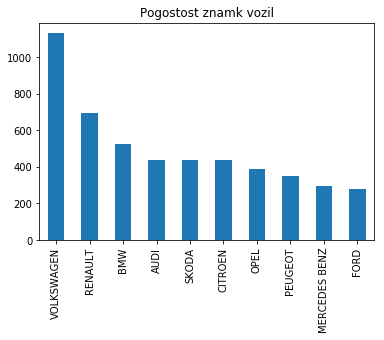

In [208]:
# Odgovor

znamke_top_10.plot(title='Pogostost znamk vozil', kind='bar')


### 2.2) Analiza - Maksimalna hitrost vozila v primerjavi s spoloma `4 pts`

Izdelejte nov dataframe z imenom `df_osebna_spol`, v katerem shranite samo vrstice, ki predstavljajo osebna vozila (stolpec `Kategorija_vozila` -> vrednost `osebni avtomobil`).

`1 pts`

In [211]:
# Odgovor
df_osebna_spol  = df.loc[df['Kategorija_vozila'] == 'osebni avtomobil']
df_osebna_spol.head()

,Prva_registracija,Tablica_kraj,Starost_vozinka,Spol_voznika,Upravna_enota_sifra,Znamka,Država_proizvodnje,Masa_vozila,Kategorija_vozila,Moc,Gorivo,Stevilo_sedezev,Hitrost_max,Poraba_goriva,Leto_izdelave,Upravna_enota
1,2019-03-25,MURSKA SOBOTA,58,Z,36,FIAT,ITA,1270.0,osebni avtomobil,70.0,Bencin,5,185.0,"7,7",2019,MURSKA SOBOTA
4,2011-04-26,NOVA GORICA,63,Z,37,MERCEDES BENZ,DEU,1435.0,osebni avtomobil,103.0,Dizel,5,200.0,"5,3",2011,NOVA GORICA
5,2015-10-16,MURSKA SOBOTA,56,M,36,AUDI,DEU,1615.0,osebni avtomobil,100.0,Dizel,5,215.0,4,2015,MURSKA SOBOTA
6,2015-04-17,MARIBOR,47,M,42,AUDI,DEU,1910.0,osebni avtomobil,200.0,Dizel,5,250.0,"5,3",2015,PTUJ
7,2015-09-18,LJUBLJANA,37,Z,24,MERCEDES BENZ,DEU,1420.0,osebni avtomobil,80.0,Dizel,5,190.0,4,2015,LJUBLJANA


V `df_osebna_spol` shranite samo stolpca `Spol_voznika` in `Hitrost_max`. z uporabo `loc metode`.

`1 pts`

In [215]:
# Odgovor
df_osebna_spol = df_osebna_spol.loc[:,['Spol_voznika', 'Hitrost_max']]
df_osebna_spol.head()


,Spol_voznika,Hitrost_max
1,Z,185.0
4,Z,200.0
5,M,215.0
6,M,250.0
7,Z,190.0


Izračunajte povprečno maksimalno hitrost (stolpec `Hitrost_max`) za vsakega izmed spolov.

`2 pts`

In [216]:
# Odgovor
povp_max_hitrost = df_osebna_spol.groupby('Spol_voznika').mean()
povp_max_hitrost

,Hitrost_max
Spol_voznika,
M,197.326993
Z,188.347114


### 2.3) Analiza - Primerjava moči vozil po regijah `6 pts`

Izdelejte nov dataframe z imenom `df_osebna_2000_naprej`, v katerem shranite samo vrstice, ki predstavljajo osebna vozila (stolpec `Kategorija_vozila` -> vrednost `osebni avtomobil`), ki so bila izdelana po letu 2000 (vključno z letom 2000, stolpec `Leto_izdelave` >= 2000).

`2 pts`

In [224]:
# Odgovor
df_osebna_2000_naprej = df.loc[(df['Kategorija_vozila'] == 'osebni avtomobil') & (df['Leto_izdelave'] >= 2000)]

df_osebna_2000_naprej.head()

,Prva_registracija,Tablica_kraj,Starost_vozinka,Spol_voznika,Upravna_enota_sifra,Znamka,Država_proizvodnje,Masa_vozila,Kategorija_vozila,Moc,Gorivo,Stevilo_sedezev,Hitrost_max,Poraba_goriva,Leto_izdelave,Upravna_enota
1,2019-03-25,MURSKA SOBOTA,58,Z,36,FIAT,ITA,1270.0,osebni avtomobil,70.0,Bencin,5,185.0,"7,7",2019,MURSKA SOBOTA
4,2011-04-26,NOVA GORICA,63,Z,37,MERCEDES BENZ,DEU,1435.0,osebni avtomobil,103.0,Dizel,5,200.0,"5,3",2011,NOVA GORICA
5,2015-10-16,MURSKA SOBOTA,56,M,36,AUDI,DEU,1615.0,osebni avtomobil,100.0,Dizel,5,215.0,4,2015,MURSKA SOBOTA
6,2015-04-17,MARIBOR,47,M,42,AUDI,DEU,1910.0,osebni avtomobil,200.0,Dizel,5,250.0,"5,3",2015,PTUJ
7,2015-09-18,LJUBLJANA,37,Z,24,MERCEDES BENZ,DEU,1420.0,osebni avtomobil,80.0,Dizel,5,190.0,4,2015,LJUBLJANA


Dobljen dataframe grupirajte po stolpcu `Tablica_kraj` in izračunjte povprečno vrednost za stolpec `Moc`. Dobljen Series poimenujte `moc_povprecna`.

`2 pts`

In [238]:
# Odgovor

moc_povprecna = df_osebna_2000_naprej.groupby('Tablica_kraj')['Moc'].mean()
moc_povprecna

Tablica_kraj
CC                 85.000000
CD                 81.000000
CELJE              94.528000
KOPER              96.814175
KRANJ              92.579100
KRSKO              94.930435
LJUBLJANA          96.670052
M                 103.000000
MARIBOR            93.807495
MURSKA SOBOTA      91.287870
NOVA GORICA        95.795427
NOVO MESTO         94.647518
POSTOJNA           91.053226
SLOVENJ GRADEC     95.432710
Name: Moc, dtype: float64

V grafu prikažite `moc_povprecna` za vsako regijo. Uporabite graf tipa `bar`.

`2 pts`

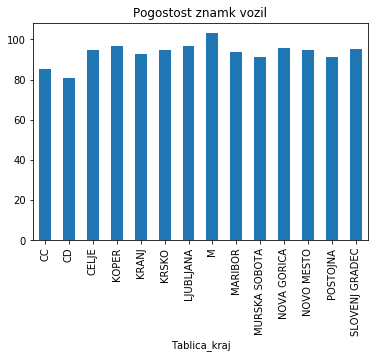

In [239]:
# Odgovor

moc_povprecna.plot(title='Pogostost znamk vozil', kind='bar')


### 2.4) Analiza - Primerjava dizel/bencin za osebna vozila po letu izdelave `17 pts`

Izdelejte nov dataframe z imenom `df_osebna_2009_naprej`, v katerem shranite samo vrstice, ki predstavljajo osebna vozila (stolpec `Kategorija_vozila` -> vrednost `osebni avtomobil`), ki so bila izdelana po letu 2009 (vključno z letom 2009, stolpec `Leto_izdelave` >= 2009).

`2 pts`

In [272]:
# Odgovor
df_osebna_2009_naprej = df.loc[(df['Kategorija_vozila'] == 'osebni avtomobil') & (df['Leto_izdelave'] >= 2009)]
df_osebna_2009_naprej.head()

,Prva_registracija,Tablica_kraj,Starost_vozinka,Spol_voznika,Upravna_enota_sifra,Znamka,Država_proizvodnje,Masa_vozila,Kategorija_vozila,Moc,Gorivo,Stevilo_sedezev,Hitrost_max,Poraba_goriva,Leto_izdelave,Upravna_enota
1,2019-03-25,MURSKA SOBOTA,58,Z,36,FIAT,ITA,1270.0,osebni avtomobil,70.0,Bencin,5,185.0,"7,7",2019,MURSKA SOBOTA
4,2011-04-26,NOVA GORICA,63,Z,37,MERCEDES BENZ,DEU,1435.0,osebni avtomobil,103.0,Dizel,5,200.0,"5,3",2011,NOVA GORICA
5,2015-10-16,MURSKA SOBOTA,56,M,36,AUDI,DEU,1615.0,osebni avtomobil,100.0,Dizel,5,215.0,4,2015,MURSKA SOBOTA
6,2015-04-17,MARIBOR,47,M,42,AUDI,DEU,1910.0,osebni avtomobil,200.0,Dizel,5,250.0,"5,3",2015,PTUJ
7,2015-09-18,LJUBLJANA,37,Z,24,MERCEDES BENZ,DEU,1420.0,osebni avtomobil,80.0,Dizel,5,190.0,4,2015,LJUBLJANA


Iz stolpca `Gorivo` izberite samo vnose, ki imajo vrednost `Bencin` ali `Dizel` in jih shranite v `df_osebna_2009_naprej`.

Namig: metoda `pandas.DataFrame.isin`

`2 pts`

In [273]:
# Odgovor

df_osebna_2009_naprej = df_osebna_2009_naprej[df_osebna_2009_naprej['Gorivo'].isin(['Bencin', 'Dizel'])]
df_osebna_2009_naprej.head()

,Prva_registracija,Tablica_kraj,Starost_vozinka,Spol_voznika,Upravna_enota_sifra,Znamka,Država_proizvodnje,Masa_vozila,Kategorija_vozila,Moc,Gorivo,Stevilo_sedezev,Hitrost_max,Poraba_goriva,Leto_izdelave,Upravna_enota
1,2019-03-25,MURSKA SOBOTA,58,Z,36,FIAT,ITA,1270.0,osebni avtomobil,70.0,Bencin,5,185.0,"7,7",2019,MURSKA SOBOTA
4,2011-04-26,NOVA GORICA,63,Z,37,MERCEDES BENZ,DEU,1435.0,osebni avtomobil,103.0,Dizel,5,200.0,"5,3",2011,NOVA GORICA
5,2015-10-16,MURSKA SOBOTA,56,M,36,AUDI,DEU,1615.0,osebni avtomobil,100.0,Dizel,5,215.0,4,2015,MURSKA SOBOTA
6,2015-04-17,MARIBOR,47,M,42,AUDI,DEU,1910.0,osebni avtomobil,200.0,Dizel,5,250.0,"5,3",2015,PTUJ
7,2015-09-18,LJUBLJANA,37,Z,24,MERCEDES BENZ,DEU,1420.0,osebni avtomobil,80.0,Dizel,5,190.0,4,2015,LJUBLJANA


Podatke grupirajte glede na `Leto_izdelave` in `Gorivo`.  Pridobite število vrednosti za posamezno kategorijo in podatke preoblikujte nazaj v tabelo (npr. s pomočjo metode `unstack()`).

Dobljen dataframe shranite v spremenljivko `count_gorivo`.

Želen rezultat:

<img width=200 src="./data/table_1.PNG">

`3 pts`

In [274]:
# Odgovor
count_gorivo = df_osebna_2009_naprej.groupby(['Leto_izdelave', 'Gorivo']).count()['Moc'].unstack()

count_gorivo


Gorivo,Bencin,Dizel
Leto_izdelave,,
2009,19,52
2010,6,57
2011,14,67
2012,14,87
2013,14,157
2014,18,395
2015,25,929
2016,18,540
2017,25,135


Preoblikujte dobljene podatke (`count_gorivo`) v obliko primerno za izrisovanje grafa tipa bar. 

Prvi korak: Preoblikujte podatke s pomočjo stack metode.

`1 pts`

In [275]:
# Odgovor
count_gorivo = count_gorivo.stack()
count_gorivo

Leto_izdelave  Gorivo
2009           Bencin      19
               Dizel       52
2010           Bencin       6
               Dizel       57
2011           Bencin      14
               Dizel       67
2012           Bencin      14
               Dizel       87
2013           Bencin      14
               Dizel      157
2014           Bencin      18
               Dizel      395
2015           Bencin      25
               Dizel      929
2016           Bencin      18
               Dizel      540
2017           Bencin      25
               Dizel      135
2018           Bencin      32
               Dizel       62
2019           Bencin    2646
               Dizel      940
dtype: int64

Drugi korak: Dobljenemu Series objektu dodelite ime `total` s pomočjo name metode.

`1 pts`

In [281]:
# Odgovor


Tretji korak: Restirajte indexe dobljenemu objektu.
    
`1 pts`

In [282]:
# Odgovor
count_gorivo.reset_index()

,Leto_izdelave,Gorivo,0
0,2009,Bencin,19
1,2009,Dizel,52
2,2010,Bencin,6
3,2010,Dizel,57
4,2011,Bencin,14
5,2011,Dizel,67
6,2012,Bencin,14
7,2012,Dizel,87
8,2013,Bencin,14
9,2013,Dizel,157


Pred izrisom podatkov, moramo podatke normalizirati. Možen postopek:
- napišete lastno funkcijo, ki normalizira posamezno skupino podatkov
- `count_gorivo` razvrstite glede na leto izdelave in nad vsako vrstico zaženete normalizacijsko funkcijo

`4 pts`

In [285]:
# Odgovor
def norm_total(group):
    group['normed total'] = group[0]/ group[0].sum()
    return group

#uporabimo apply
results = count_gorivo.groupby(['Leto_izdelave']).apply(norm_total)


results



Leto_izdelave  Leto_izdelave  Gorivo
2009           2009           Bencin      19.0
                              Dizel       52.0
               normed total                1.0
2010           2010           Bencin       6.0
                              Dizel       57.0
               normed total                1.0
2011           2011           Bencin      14.0
                              Dizel       67.0
               normed total                1.0
2012           2012           Bencin      14.0
                              Dizel       87.0
               normed total                1.0
2013           2013           Bencin      14.0
                              Dizel      157.0
               normed total                1.0
2014           2014           Bencin      18.0
                              Dizel      395.0
               normed total                1.0
2015           2015           Bencin      25.0
                              Dizel      929.0
               normed t

Namig (možne so tudi druge rešitve):

> S pomočjo funkcije `sns.barplot` izrišite graf za urejene podatke.
- na osi x prikažite `Leto_izdelave`
- na osi y prikažite `normed_total`
- `hue` vrednost naj predstavlja `Gorivo`

Želen graf:

<img width=300 src="./data/slika6.PNG">

`3 pts`

In [ ]:
# Odgovor





### 2.5) Analiza - Korelacija moč/maksimalna hitrost `6 pts`

Izračunajte koorelacijsko matriko za numerične vrednsoti v naših podatkih.

`1 pts`

In [277]:
# Odgovor

df.corr()

,Starost_vozinka,Upravna_enota_sifra,Masa_vozila,Moc,Stevilo_sedezev,Hitrost_max,Leto_izdelave
Starost_vozinka,1.000000,-0.009295,-0.004022,-0.068173,0.017011,-0.072182,0.135365
Upravna_enota_sifra,-0.009295,1.000000,-0.026427,-0.038365,-0.020637,-0.020972,0.006156
Masa_vozila,-0.004022,-0.026427,1.000000,0.412120,0.161128,-0.049158,-0.067788
Moc,-0.068173,-0.038365,0.412120,1.000000,0.554610,0.733135,-0.027786
Stevilo_sedezev,0.017011,-0.020637,0.161128,0.554610,1.000000,0.666847,0.136521
Hitrost_max,-0.072182,-0.020972,-0.049158,0.733135,0.666847,1.000000,-0.012056
Leto_izdelave,0.135365,0.006156,-0.067788,-0.027786,0.136521,-0.012056,1.000000


Katere dve spremenljivki sta najbolj povezani?

`1 pts`

In [286]:
# Odgovor - ni potreben izračun
hitrost moč


1.0

S pomočjo `sns.lmplot` funkcije izrišite graf, ki prikazuje linearno regresijo med `Hitrost_max` in `Moc`.

`2 pts`

In [ ]:
# Odgovor



Izpišite vrstico, kjer je vrednost `Moc` maksimalna.

`2 pts`

In [ ]:
# Odgovor



## Oddaja

Rešeni notebook pošljite na naslednja e-mail naslova:
- leon.stefanic@ltfe.org 
- gregor.balkovec@ltfe.org

**POMEMBNO!** Pred pošiljanjem notebook preimenujte na naslednji način:

`IZPIT_PRAKSA_IME_PRIMEK`